In [1]:
# Chapter 13
# Classification and Regression Trees

# Pre-requisites:
#   Create local R library folder if not exists, ~/R/library
#   Create ~/.Renviron with contents
#     R_LIBS_USER="~/R/library"
#local_lib_dir <- "~/R/library"   # da2
local_lib_dir <- "~/R/x86_64-pc-linux-gnu-library/3.2"   # local computer

# Install 'tree' package
install.packages("tree", repos = "https://cran.r-project.org", lib = local_lib_dir)


The downloaded source packages are in
	‘/tmp/Rtmp1pLfDz/downloaded_packages’


In [2]:
# 13.2.1
# Load libraries and data

library(tree)
#lib_flag <- require(tree)

library(rpart)

# Get California real estate data
calif <- read.table("http://www.stat.cmu.edu/~cshalizi/350/hw/06/cadata.dat",header = TRUE)


Regression tree:
tree(formula = log(MedianHouseValue) ~ Longitude + Latitude, 
    data = calif)
Number of terminal nodes:  12 
Residual mean deviance:  0.1662 = 3429 / 20630 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.75900 -0.26080 -0.01359  0.00000  0.26310  1.84100 

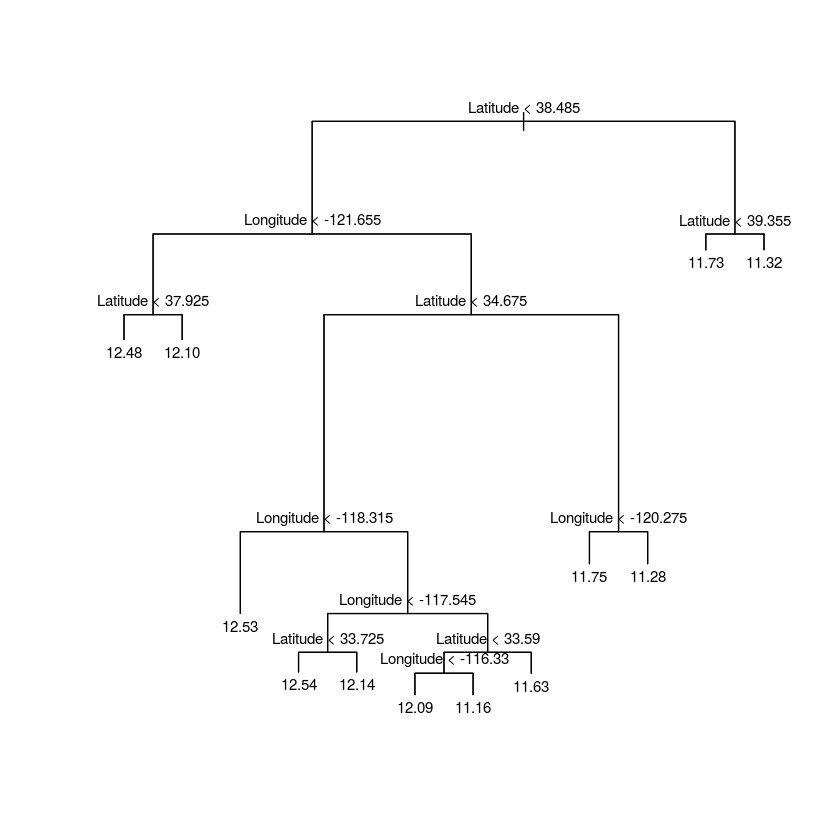

In [16]:
# 13.2.1
# Fig. 13.2 (tree)
# Regression tree for predicting housing prices from geographic location

# MedianHouseValue = f(Longitude, Latitude)
treefit <- tree(log(MedianHouseValue) ~ Longitude + Latitude, data = calif)
summary(treefit)  # provides detailed info on the partition analysis
plot(treefit)
text(treefit, cex = 0.75)  # label nodes

Call:
rpart(formula = log(MedianHouseValue) ~ Longitude + Latitude, 
    data = calif)
  n= 20640 

           CP nsplit rel error    xerror        xstd
1  0.10008348      0 1.0000000 1.0000710 0.008731913
2  0.05994119      3 0.6997496 0.7019733 0.006825299
3  0.02835622      4 0.6398084 0.6454546 0.006489847
4  0.02347920      5 0.6114522 0.6149349 0.006256008
5  0.01814821      6 0.5879730 0.5969072 0.006134837
6  0.01550727      7 0.5698248 0.5744188 0.006051608
7  0.01438575      9 0.5388102 0.5509913 0.005859307
8  0.01157135     10 0.5244245 0.5316772 0.005793001
9  0.01052269     11 0.5128531 0.5159613 0.005705936
10 0.01031190     13 0.4918077 0.5003839 0.005684445
11 0.01000000     15 0.4711839 0.4855248 0.005605764

Variable importance
 Latitude Longitude 
       53        47 

Node number 1: 20640 observations,    complexity param=0.1000835
  mean=12.08488, MSE=0.3238984 
  left son=2 (2061 obs) right son=3 (18579 obs)
  Primary splits:
      Latitude  < 38.485   to the rig

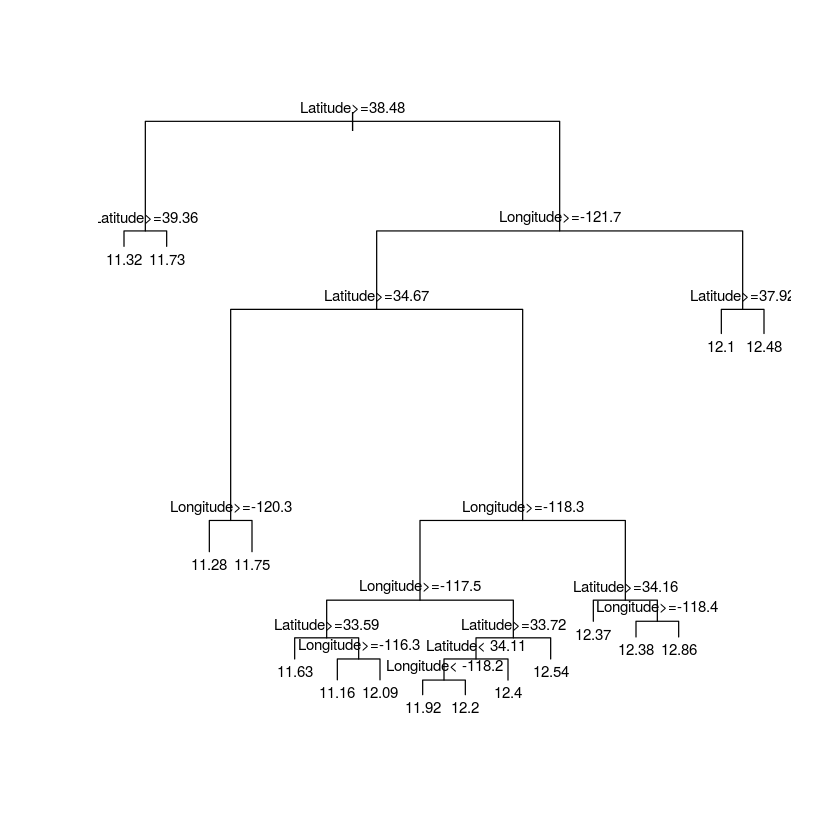

In [17]:
# 13.2.1
# Fig. 13.2 (rpart)
# Regression tree for predicting housing prices from geographic location

# MedianHouseValue = f(Longitude, Latitude)
rpartfit <- rpart(log(MedianHouseValue) ~ Longitude + Latitude, data = calif)
summary(rpartfit)
plot(rpartfit)
text(rpartfit, cex = 0.75)

# unbalanced data? rpart


Regression tree:
tree(formula = log(MedianHouseValue) ~ TotalRooms + TotalBedrooms + 
    Households, data = calif)
Variables actually used in tree construction:
[1] "TotalRooms"    "TotalBedrooms"
Number of terminal nodes:  5 
Residual mean deviance:  0.2995 = 6181 / 20640 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.35100 -0.37750  0.02453  0.00000  0.37610  1.15500 

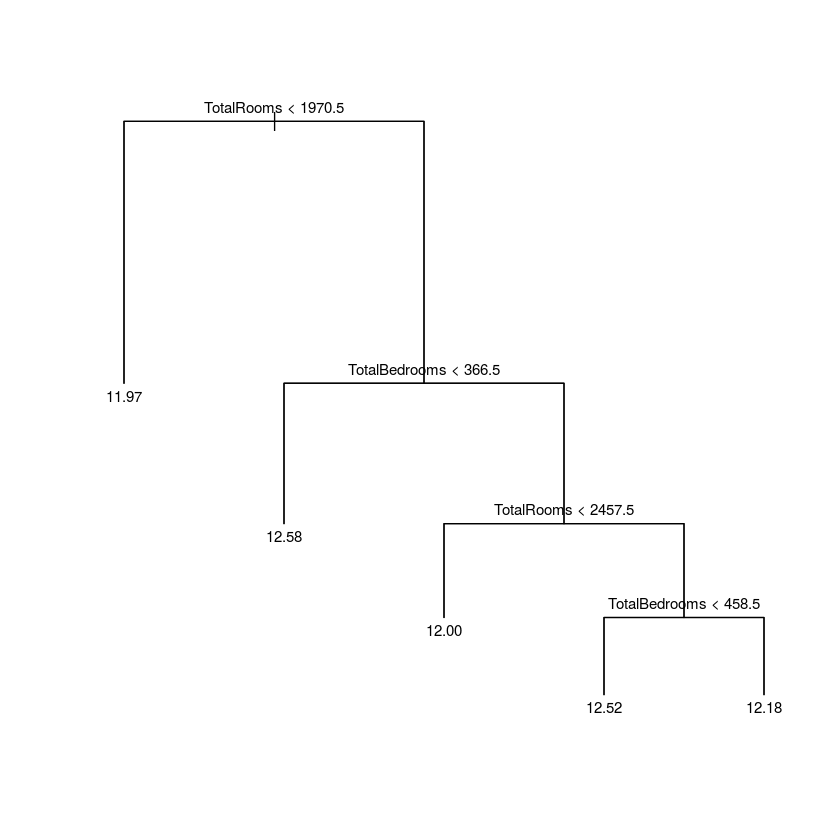

In [18]:
# 13.2.1
# Fig. custom
# Regression tree for predicting housing prices from geographic location

# MedianHouseValue = f(TotalRooms, TotalBedrooms, Households)
datafit <- tree(log(MedianHouseValue) ~ TotalRooms + TotalBedrooms + Households, data = calif)
#datafit = rpart(log(MedianHouseValue) ~ TotalRooms + TotalBedrooms + Households, data = calif)
summary(datafit)
plot(datafit)
text(datafit, cex = 0.75)

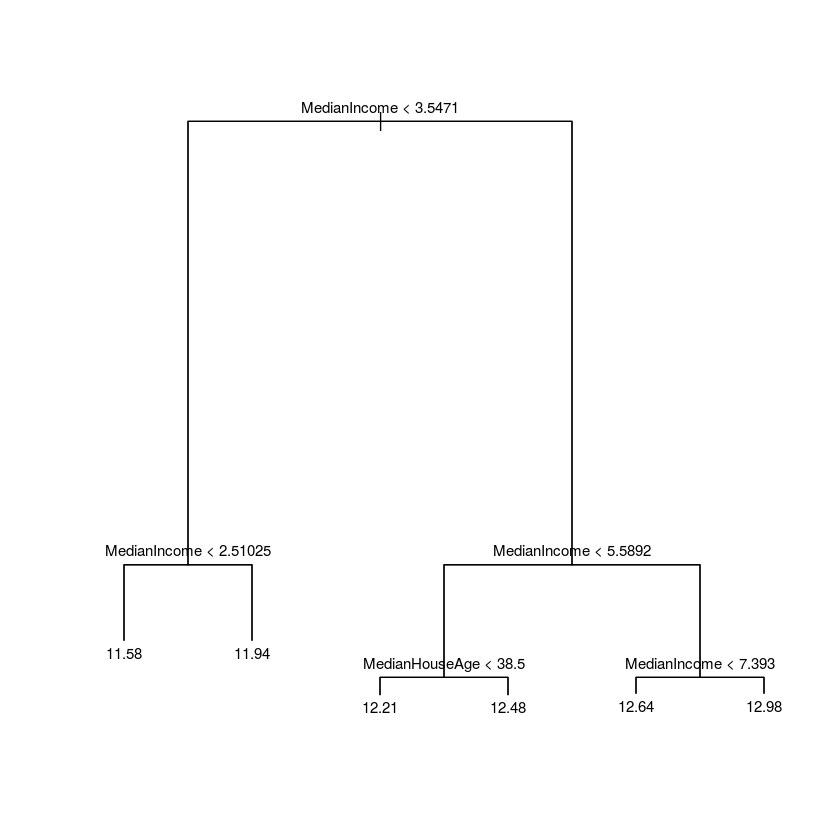

In [8]:
# 13.2.1
# Fig. custom
# Regression tree for predicting housing prices from geographic location

# MedianHouseValue = f(MedianIncome, MedianHouseAge)
treefit <- tree(log(MedianHouseValue) ~ MedianIncome + MedianHouseAge, data = calif)
plot(treefit)
text(treefit, cex = 0.75)

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
 14999  82300 107200 134000 157300 179700 209400 241930 290000 376600 500001

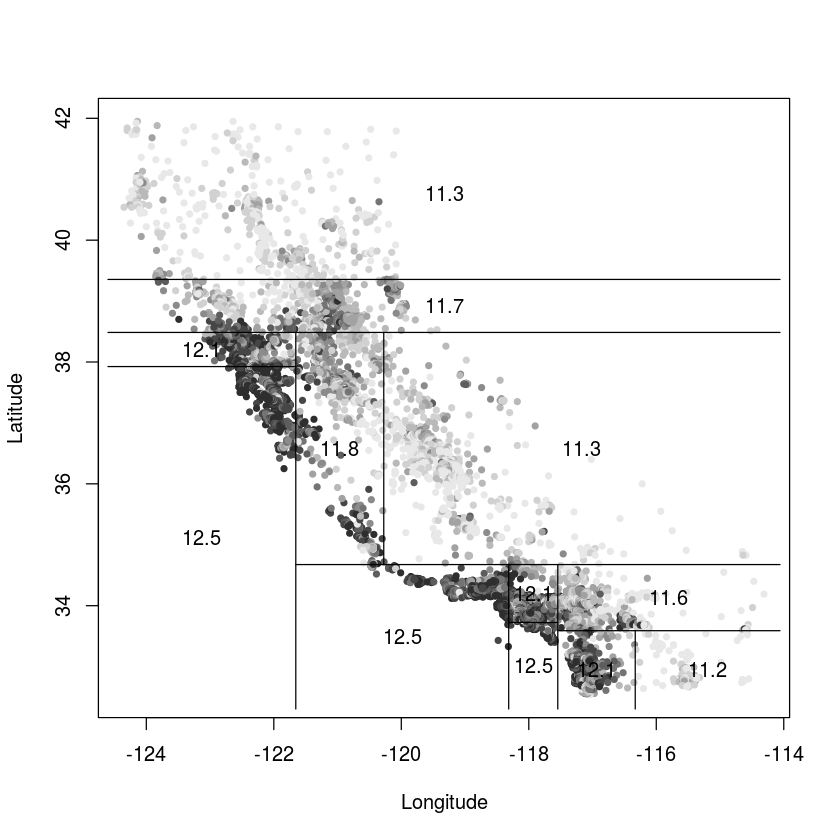

In [19]:
# 13.2.1
# Fig. 13.3
# Map of median house prices (color-coded by decile)
# Partition of tree fit

# MedianHouseValue = f(Longitude, Latitude)
treefit <- tree(log(MedianHouseValue) ~ Longitude + Latitude, data = calif)

# Produce sample deciles
price.deciles <- quantile(calif$MedianHouseValue, 0:10/10)  # probability values [0,1]
price.deciles

# Divide MedianHouseValue into ranges based on price deciles
cut.prices <- cut(calif$MedianHouseValue, price.deciles, include.lowest = TRUE)

plot(calif$Longitude, calif$Latitude, col = grey(10:2/11)[cut.prices], pch = 20, xlab = "Longitude", ylab = "Latitude")

# Add partition labels to plot
partition.tree(treefit, ordvars = c("Longitude", "Latitude"), add = TRUE)


Regression tree:
tree(formula = log(MedianHouseValue) ~ Longitude + Latitude, 
    data = calif, mindev = 0.001)
Number of terminal nodes:  68 
Residual mean deviance:  0.1052 = 2164 / 20570 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.94700 -0.19790 -0.01872  0.00000  0.19970  1.60600 

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
 14999  82300 107200 134000 157300 179700 209400 241930 290000 376600 500001

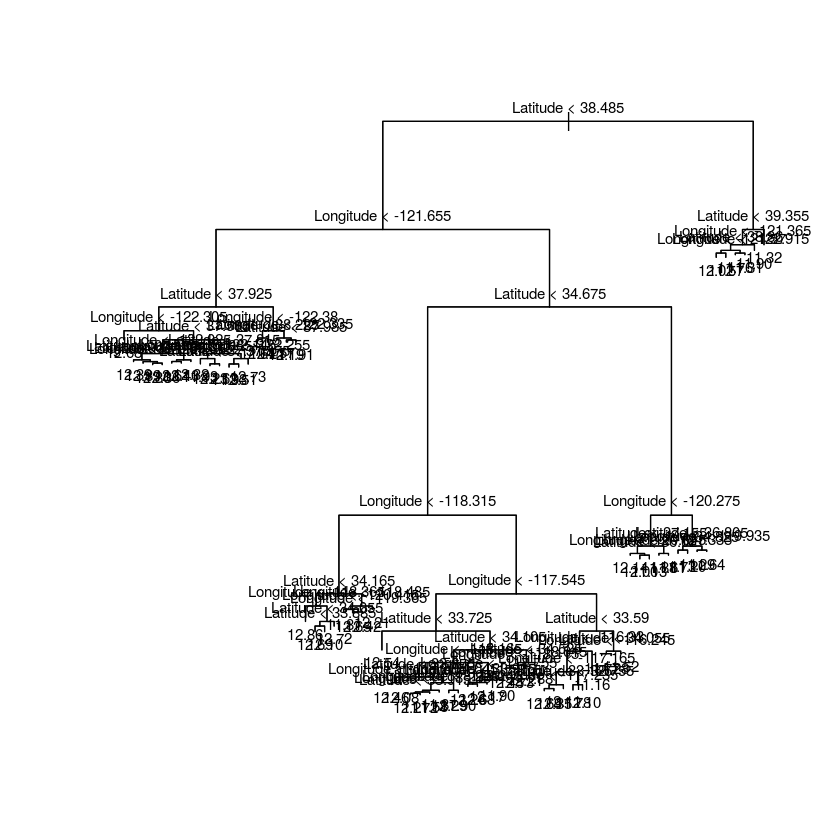

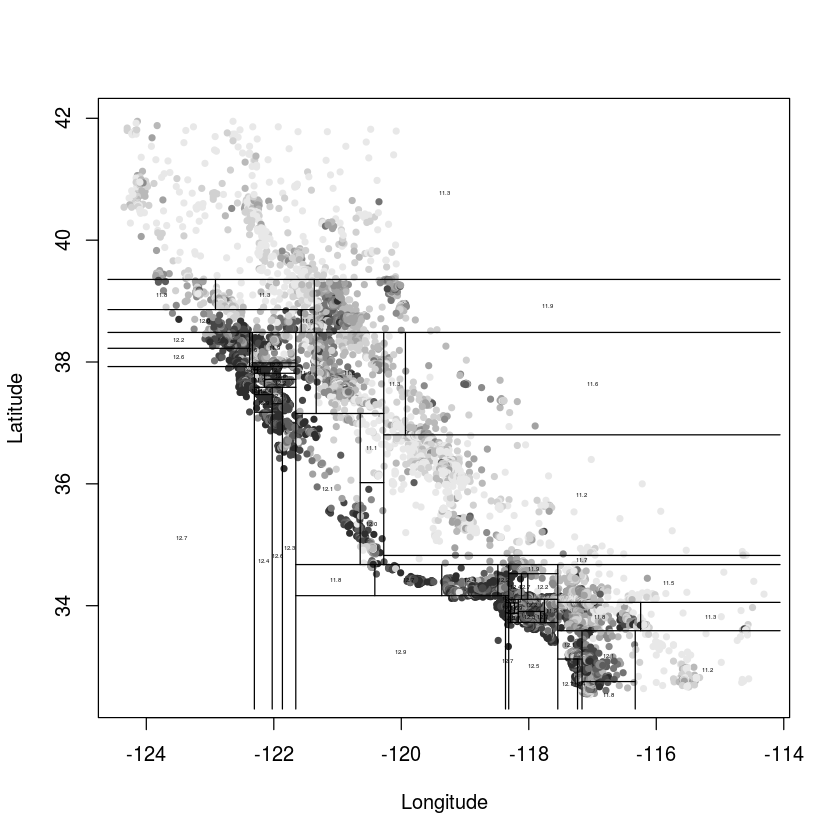

In [3]:
# 13.2.1
# Fig. 13.4
# As Fig. 13.2 but allowing splits for smaller reductions in error than default

# tree.control(nobs,mincut,minsize,mindev)
# nobs    The number of observations in the training set.
# mincut  The minimum number of observations to include in either child node. This is a
#         weighted quantity; the observational weights are used to compute the ‘number’. The default is 5.
# minsize The smallest allowed node size: a weighted quantity. The default is 10.
# mindev  The within-node deviance must be at least this times that of the root node for the node to be split.

# MedianHouseValue = f(Longitude, Latitude)
treefit <- tree(log(MedianHouseValue) ~ Longitude + Latitude, data = calif, mindev = 0.001)
summary(treefit)
plot(treefit)
text(treefit, cex = 0.75)

# Fig. 13.5
# Partition of tree fit
price.deciles <- quantile(calif$MedianHouseValue, 0:10/10)  # probability values [0,1]
price.deciles
cut.prices <- cut(calif$MedianHouseValue, price.deciles, include.lowest = TRUE)
plot(calif$Longitude, calif$Latitude, col = grey(10:2/11)[cut.prices], pch = 20, xlab = "Longitude", ylab = "Latitude")
partition.tree(treefit, ordvars = c("Longitude", "Latitude"), add = TRUE, cex = 0.3)


Regression tree:
tree(formula = log(MedianHouseValue) ~ ., data = calif)
Variables actually used in tree construction:
[1] "MedianIncome"   "Latitude"       "Longitude"      "MedianHouseAge"
Number of terminal nodes:  15 
Residual mean deviance:  0.1321 = 2724 / 20620 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.86000 -0.22650 -0.01475  0.00000  0.20740  2.03900 

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
 14999  82300 107200 134000 157300 179700 209400 241930 290000 376600 500001

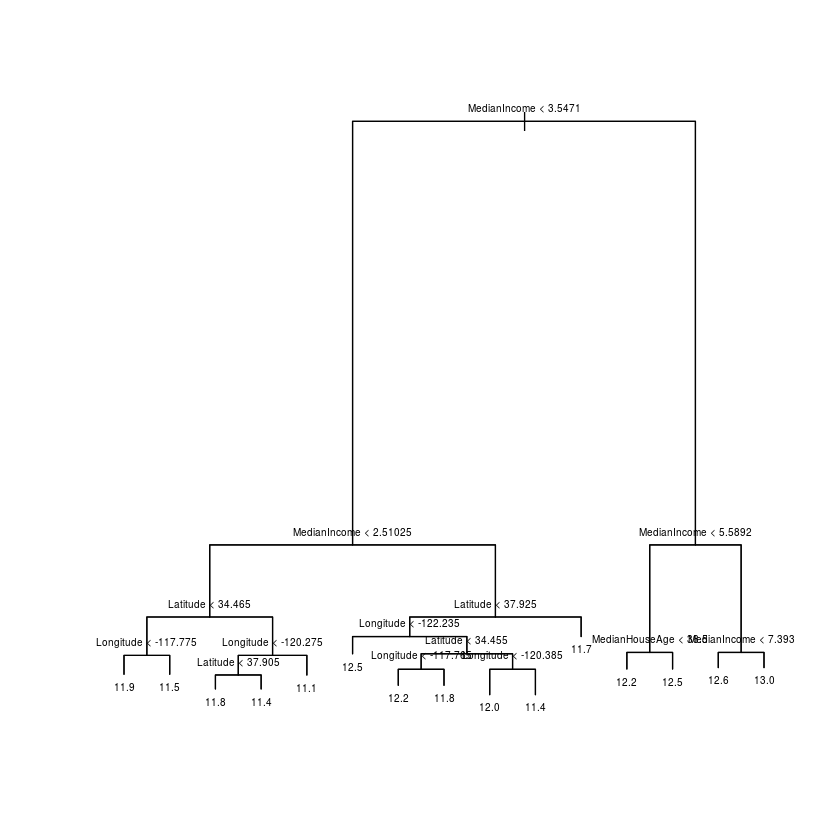

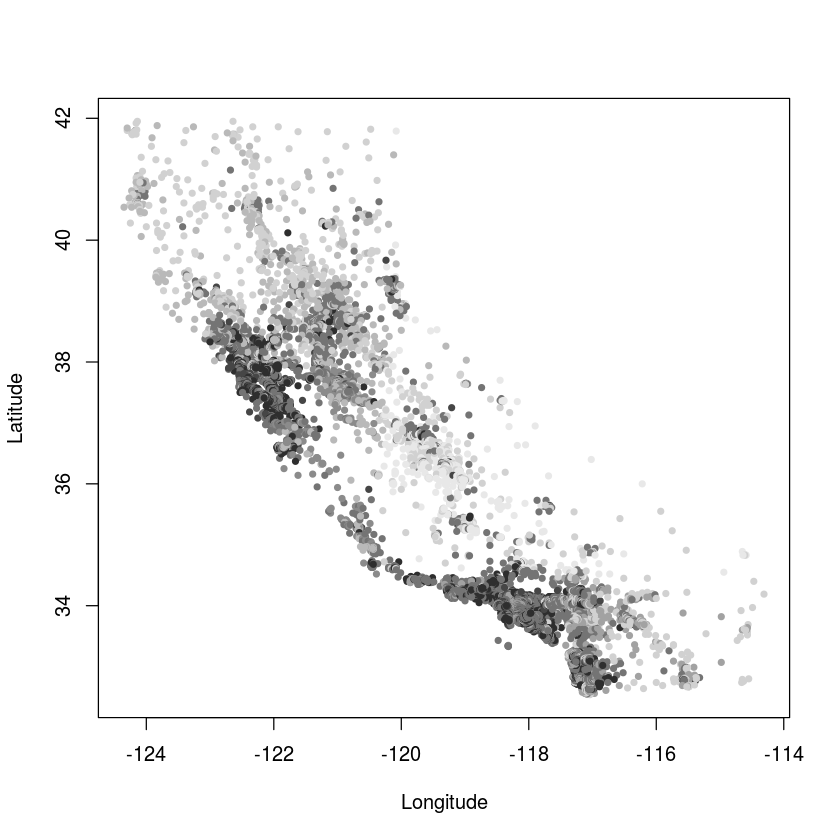

In [4]:
# 13.2.2
# Fig. 13.6
# Regression tree fitting

# MedianHouseValue = f(...)
treefit <- tree(log(MedianHouseValue) ~ ., data = calif)
summary(treefit)
plot(treefit)
text(treefit, cex = 0.5, digits = 3)

# Fig. 13.7
# Predicted prices for tree fit

# Divide MedianHouseValue into ranges based on price deciles
price.deciles <- quantile(calif$MedianHouseValue, 0:10/10)  # probability values [0,1]
price.deciles

# Predict prices for tree model
cut.predictions <- cut(predict(treefit), log(price.deciles), include.lowest = TRUE)

plot(calif$Longitude, calif$Latitude, col = grey(10:2/11)[cut.predictions], pch = 20, xlab = "Longitude", ylab = "Latitude")


Regression tree:
tree(formula = log(MedianHouseValue) ~ Longitude + Latitude, 
    data = calif)
Number of terminal nodes:  12 
Residual mean deviance:  0.1662 = 3429 / 20630 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.75900 -0.26080 -0.01359  0.00000  0.26310  1.84100 


Regression tree:
snip.tree(tree = treefit, nodes = c(3L, 4L, 11L, 21L))
Number of terminal nodes:  5 
Residual mean deviance:  0.2073 = 4277 / 20640 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.759000 -0.307900 -0.007209  0.000000  0.308100  1.612000 

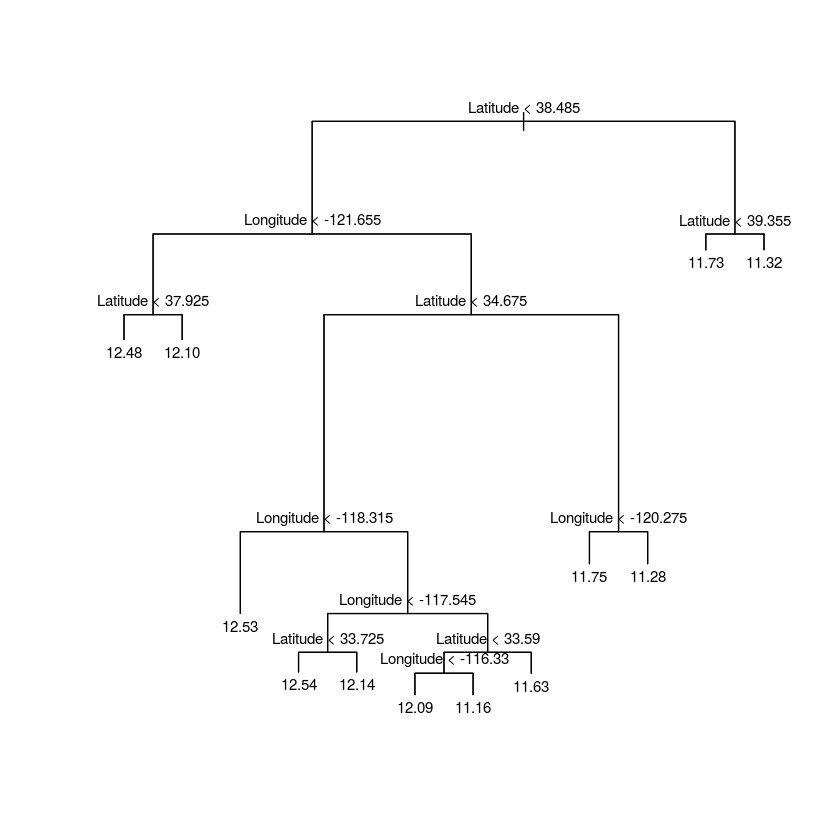

NULL

       Length Class  Mode     
size   9      -none- numeric  
dev    9      -none- numeric  
k      9      -none- numeric  
method 1      -none- character

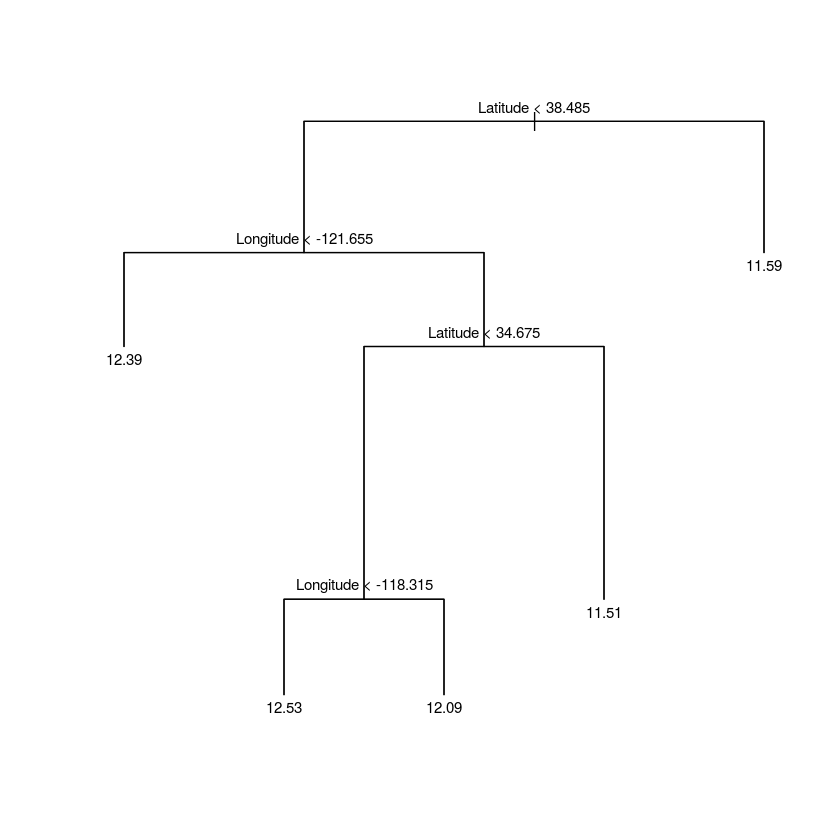

[1] 3428.558 3505.915 3602.088 3809.428 3930.754 4087.718 4277.287 4678.010
[9] 6685.263

min error tree index =  1 
min error tree size =  12 


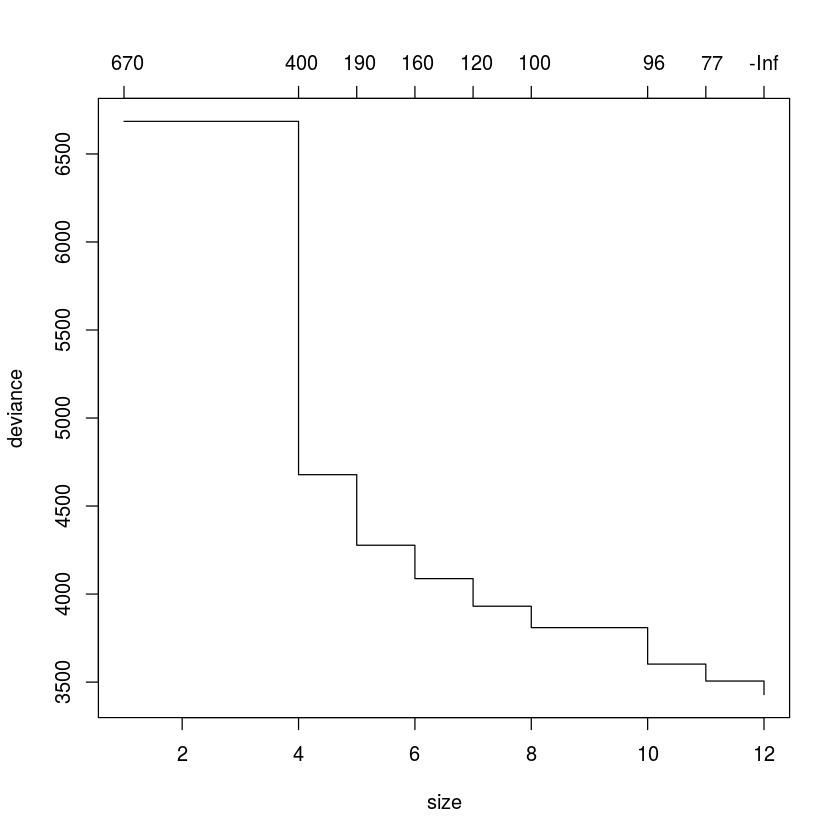

In [23]:
# 13.2.2.1
# Pruning

# MedianHouseValue = f(Longitude, Latitude)
treefit <- tree(log(MedianHouseValue) ~ Longitude + Latitude, data = calif)
summary(treefit)
plot(treefit)
text(treefit, cex = 0.75)

# Prune tree to no more than 'best' leaves
treeseq <- prune.tree(treefit, best = 5)
#treeseq <- prune.tree(treefit, best = 5, newdata = mydata)
summary(treeseq)
plot(treeseq)
text(treeseq, cex = 0.75)
treeseq$dev  # returns NULL

# Prune tree (default method = deviance)
#   a. regression trees     -> deviance
#   b. classification trees -> misclass
# If you do not specify best, it returns an object with number
# of leaves in pruned tree with corresponding errors
#   a. continuous response -> minimize MSE
#   b. discrete response   -> -log(likelihood)
treeseq <- prune.tree(treefit)
summary(treeseq)
plot(treeseq)
treeseq$dev
# x1-axis -> tree size
# y-axis  -> sum of squared errors
# x2-axis -> cost/complexity penalty, h
#            pruning minimizes (total_error + h*complexity)

# Get index and size of subtrees with smallest error
opttrees = which(treeseq$dev == min(treeseq$dev))
cat("min error tree index = ", opttrees, "\n")
cat("min error tree size = ", min(treeseq$size[opttrees]), "\n")



Regression tree:
tree(formula = log(MedianHouseValue) ~ Longitude + Latitude, 
    data = calif)
Number of terminal nodes:  12 
Residual mean deviance:  0.1662 = 3429 / 20630 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.75900 -0.26080 -0.01359  0.00000  0.26310  1.84100 

       Length Class  Mode     
size   9      -none- numeric  
dev    9      -none- numeric  
k      9      -none- numeric  
method 1      -none- character

[1] 3379.017 3553.541 3797.302 3858.021 3981.735 4102.445 4292.867 4685.791
[9] 6686.230

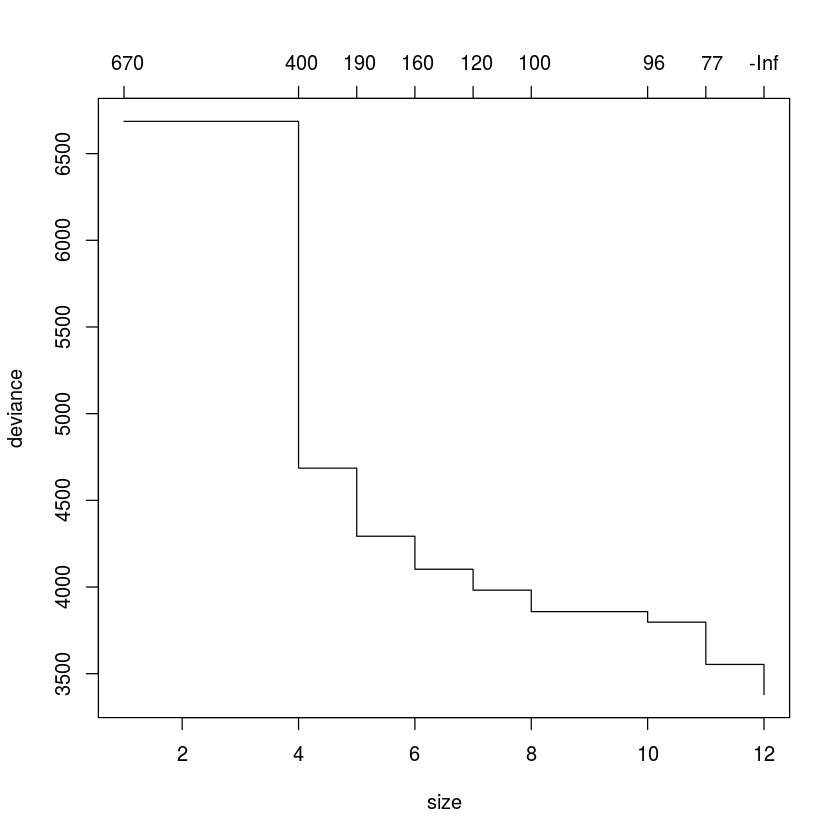

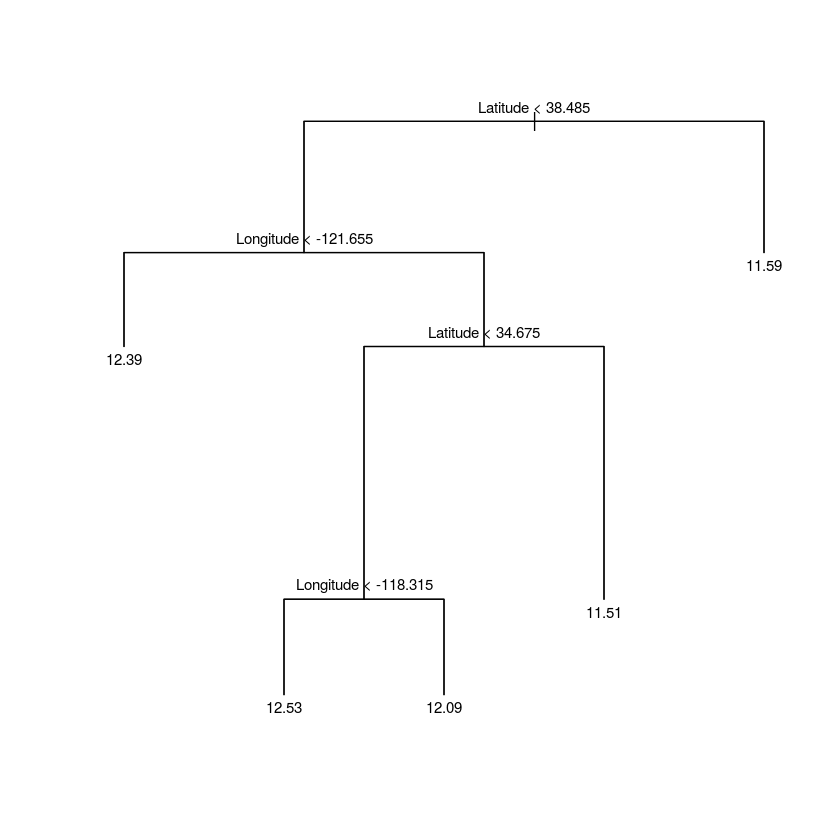

In [45]:
# 13.2.2.1
# Cross-validation and pruning

# MedianHouseValue = f(Longitude, Latitude)
treefit <- tree(log(MedianHouseValue) ~ Longitude + Latitude, data = calif)
summary(treefit)

# k-fold cross-validation (default K = 10)
# Requires fitted tree and a function (default FUN = prune.tree)
treecv = cv.tree(treefit)
#treecv = cv.tree(treefit, FUN = prune.tree, K = 10)
summary(treecv)
plot(treecv)
treecv$dev

# Cross-validation and pruning
treecv = cv.tree(treefit, best = 5)
#summary(treecv)  # too much output!
plot(treecv)
text(treecv, cex = 0.75)



Regression tree:
tree(formula = log(MedianHouseValue) ~ Longitude + Latitude, 
    data = calif, mindev = 0.001)
Number of terminal nodes:  68 
Residual mean deviance:  0.1052 = 2164 / 20570 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.94700 -0.19790 -0.01872  0.00000  0.19970  1.60600 

       Length Class  Mode     
size   53     -none- numeric  
dev    53     -none- numeric  
k      53     -none- numeric  
method  1     -none- character

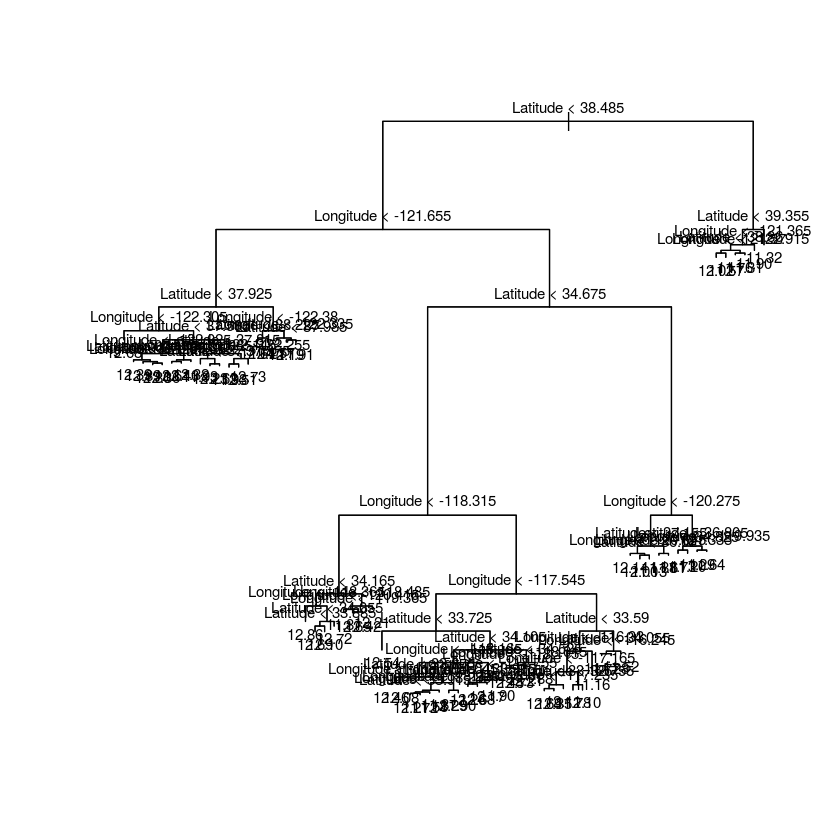

[1] 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615
 [9] 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615
[17] 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615
[25] 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615
[33] 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615 3417.615
[41] 3417.615 3417.615 3458.193 3505.675 3519.194 3555.856 3816.164 3836.352
[49] 3973.656 4109.356 4296.955 4696.176 6686.079


Regression tree:
snip.tree(tree = treefit, nodes = c(87L, 171L, 41L, 344L, 23L, 
81L, 345L, 341L, 6L, 340L, 9L, 22L, 8L))
Number of terminal nodes:  17 
Residual mean deviance:  0.1495 = 3084 / 20620 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.7860 -0.2442 -0.0117  0.0000  0.2492  1.8410 

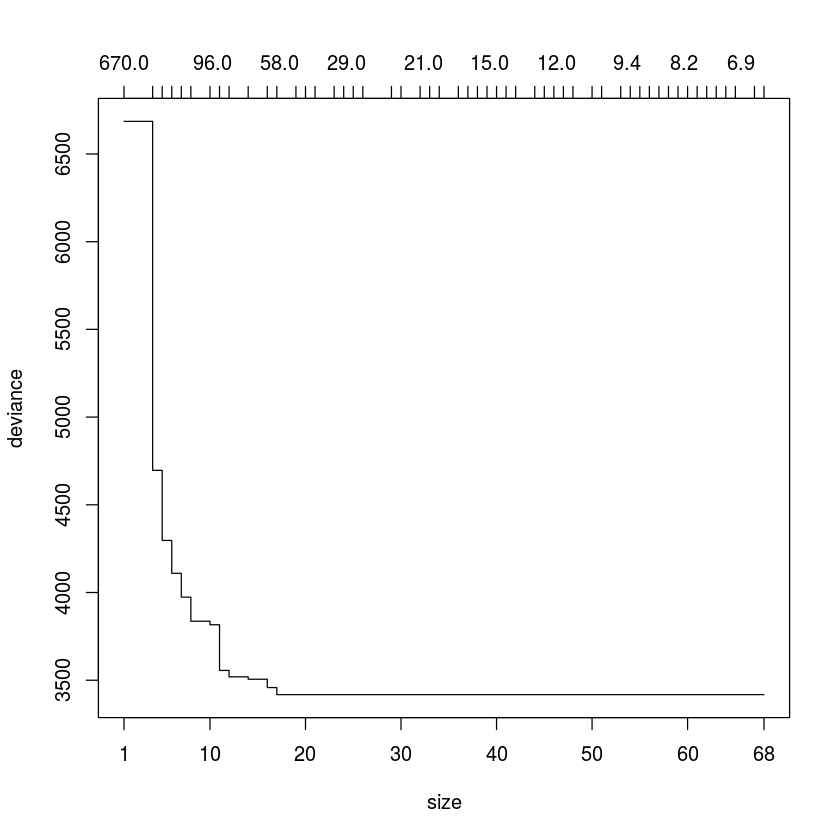

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
 14999  82300 107200 134000 157300 179700 209400 241930 290000 376600 500001

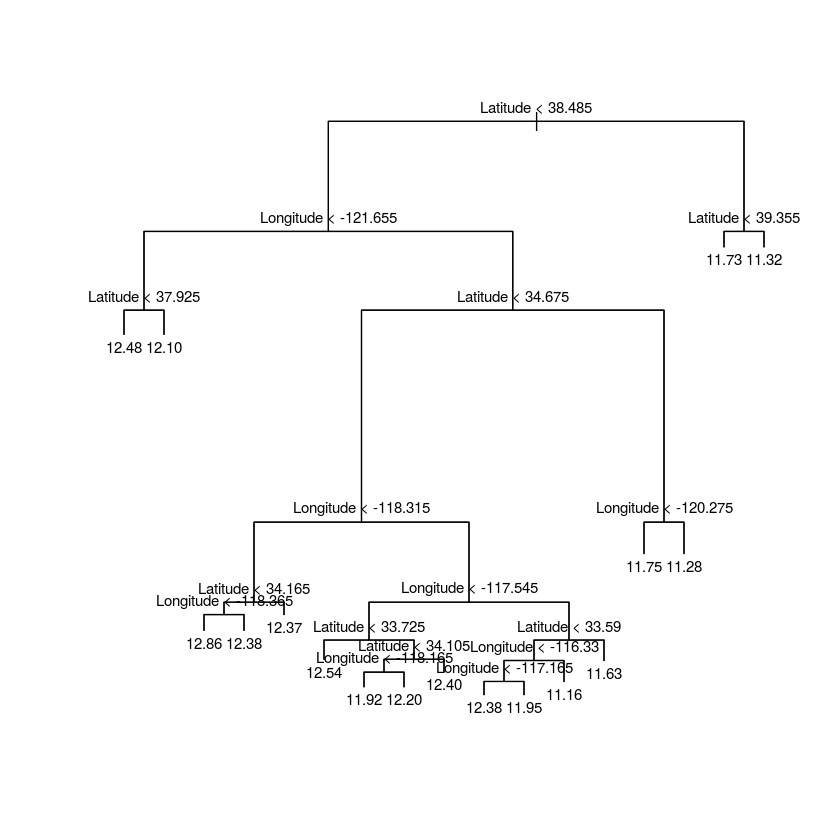

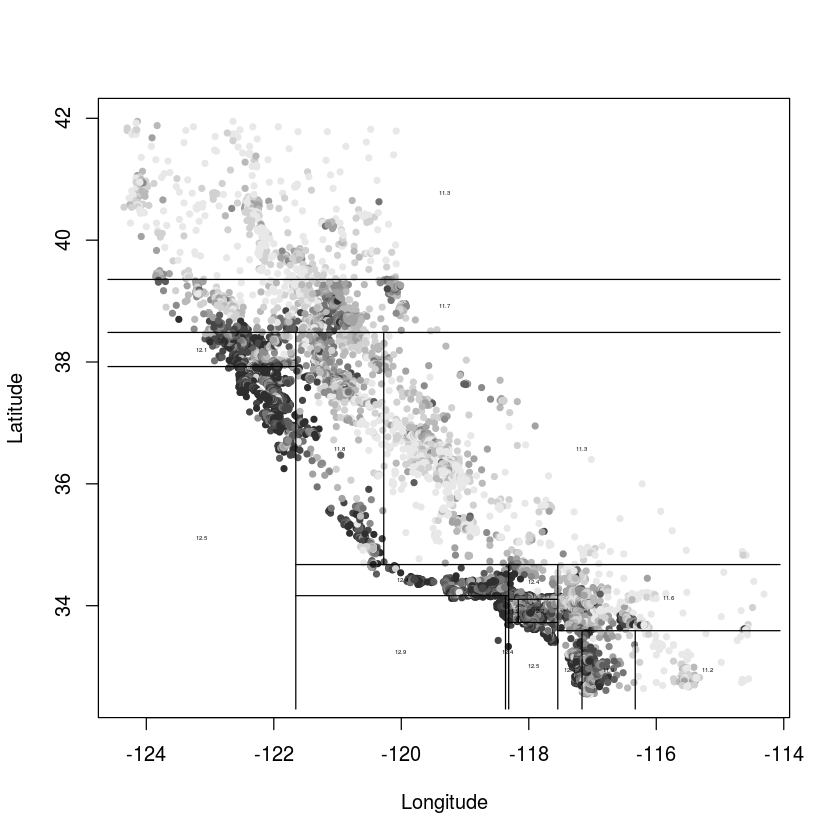

In [50]:
# 13.2.2.1
# Cross-validation and pruning

# Recall Fig. 13.4
# Allow splits for smaller reductions in error than default
# MedianHouseValue = f(Longitude, Latitude)
treefit <- tree(log(MedianHouseValue) ~ Longitude + Latitude, data = calif, mindev = 0.001)
summary(treefit)
plot(treefit)
text(treefit, cex = 0.75)

# Fig. 13.8
# Cross-validation of tree from Fig. 13.4
treecv <- cv.tree(treefit)
summary(treecv)
plot(treecv)
treecv$dev

# Fig. 13.9
# Pruning by 10-fold cross-validation of tree from Fig. 13.4
opttrees <- which(treecv$dev == min(treecv$dev))
bestleaves <- min(treecv$size[opttrees])
treepruned = prune.tree(treefit, best = bestleaves)
summary(treepruned)
plot(treepruned)
text(treepruned, cex = 0.75)

# Fig. 13.10
# Partition of pruned tree from Fig. 13.5
price.deciles <- quantile(calif$MedianHouseValue, 0:10/10)  # probability values [0,1]
price.deciles
cut.prices <- cut(calif$MedianHouseValue, price.deciles, include.lowest = TRUE)
plot(calif$Longitude, calif$Latitude, col = grey(10:2/11)[cut.prices], pch = 20, xlab = "Longitude", ylab = "Latitude")
partition.tree(treepruned, ordvars = c("Longitude", "Latitude"), add = TRUE, cex = 0.3)
